In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings


%matplotlib inline

In [2]:
data = pd.read_csv('output.csv')

In [3]:
data = data[['Severity', 'Start_Lng', 'Start_Lat', 'Distance(mi)', 'State', 'Weather_Condition', 'DelayTime', 'Wind_Speed(mph)', 'Wind_Direction', 'Junction', 'Pressure(in)', 'Humidity(%)', 'Visibility(mi)', 'Give_Way', 'Side']]


In [4]:
import pandas as pd


data['Severity'] = data['Severity'].map({1: 0, 2: 0, 3: 1, 4: 1})

# Verify the updated severity column
print(data['Severity'].value_counts())


0    2407971
1     247912
Name: Severity, dtype: int64


In [5]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'df' containing your dataset

# Calculate the number of rows to remove (50% of severity 0 rows)
rows_to_remove = int(len(data[data['Severity'] == 0]) * 0.8)

# Randomly select rows to remove
random_indices = np.random.choice(data[data['Severity'] == 0].index, rows_to_remove, replace=False)

# Remove selected rows from the entire dataset
data = data.drop(random_indices)

# Verify the updated dataset
print(data['Severity'].value_counts())



0    481595
1    247912
Name: Severity, dtype: int64


In [7]:
data

,Severity,Start_Lng,Start_Lat,Distance(mi),State,Weather_Condition,DelayTime,Wind_Speed(mph),Wind_Direction,Junction,Pressure(in),Humidity(%),Visibility(mi),Give_Way,Side
0,1,-83.092860,40.108910,3.230,33,55,6.0,10.4,15,False,29.76,58.0,10.0,False,1
1,1,-84.492792,39.172393,0.500,33,55,6.0,10.4,21,False,29.69,93.0,10.0,False,1
2,0,-84.032430,39.063240,1.427,33,77,6.0,8.1,21,False,29.66,100.0,10.0,False,1
3,0,-84.186030,39.775650,0.227,33,74,6.0,2.3,15,False,29.63,100.0,3.0,False,1
6,0,-82.968490,40.109310,0.826,33,99,6.0,3.5,22,False,29.59,100.0,0.5,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655863,0,-117.161180,32.773510,0.320,3,14,0.5,7.0,15,True,29.39,62.0,10.0,False,1
2655864,0,-118.500833,34.323752,1.654,3,14,0.5,0.0,0,False,28.78,39.0,10.0,False,1
2655869,1,-117.887980,33.779130,0.174,3,14,0.5,10.0,11,False,29.75,56.0,10.0,False,1
2655875,0,-119.228000,34.261030,0.189,3,14,0.5,9.0,19,True,29.76,68.0,10.0,False,1


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
y = data['Severity']
X = data.drop('Severity', axis=1)
#data_X = X.astype(np.float)

In [11]:
scaler = StandardScaler()

X = scaler.fit_transform(data)

In [10]:
import sklearn

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.75, random_state=100)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, train_size=0.8)
X_val, X_test, y_val, y_test  = train_test_split(X_temp, y_temp, test_size=0.25, train_size=0.75)


# Train the logistic regression model
logistic_model = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predict on the validation set
y_pred_logistic = logistic_model.predict(X_val)

# Calculate the evaluation metrics on the validation set
accuracy = accuracy_score(y_val, y_pred_logistic)
recall = recall_score(y_val, y_pred_logistic, average="weighted")
precision = precision_score(y_val, y_pred_logistic, average="weighted")
f1 = f1_score(y_val, y_pred_logistic, average="weighted")
cf_matrix = confusion_matrix(y_val, y_pred_logistic)

# Print the evaluation metrics on the validation set
print("Results of Logistic Regression on Validation Set")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1-score    : ", f1)
print("Confusion Matrix   : ")
print(cf_matrix)

# Predict on the test set
y_pred_test = logistic_model.predict(X_test)

# Calculate the evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average="weighted")
precision_test = precision_score(y_test, y_pred_test, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")
cf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics on the test set
print("Results of Logistic Regression on Test Set")
print("Accuracy    : ", accuracy_test)
print("Recall      : ", recall_test)
print("Precision   : ", precision_test)
print("F1-score    : ", f1_test)
print("Confusion Matrix   : ")
print(cf_matrix_test)


Results of Logistic Regression on Validation Set
Accuracy    :  0.6819311680953338
Recall      :  0.6819311680953338
Precision   :  0.6571835781544563
F1-score    :  0.6454155313446214
Confusion Matrix   : 
[[64472  7868]
 [26937 10149]]
Results of Logistic Regression on Test Set
Accuracy    :  0.6823390722666959
Recall      :  0.6823390722666959
Precision   :  0.6576157397795589
F1-score    :  0.6453063837105761
Confusion Matrix   : 
[[21534  2587]
 [ 9000  3355]]


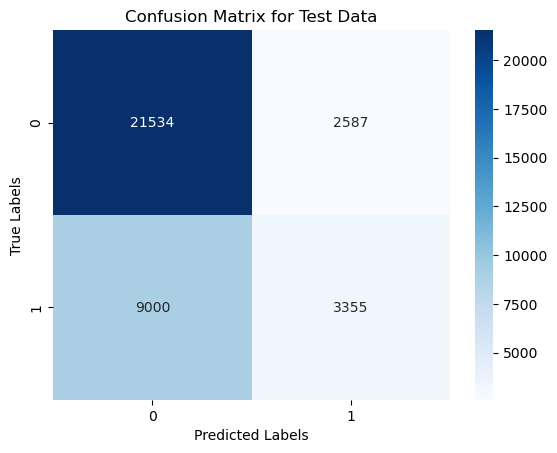

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix_values = [[21534, 2587],[ 9000, 3355]]

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix_values, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Data")
plt.xticks([0.5, 1.5], ["0", "1"])
plt.yticks([0.5, 1.5], ["0", "1"])

# Display the plot
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, train_size=0.75)

# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = dt_classifier.predict(X_val)

# Calculate the evaluation metrics on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val, average="weighted")
precision_val = precision_score(y_val, y_pred_val, average="weighted")
f1_val = f1_score(y_val, y_pred_val, average="weighted")
cf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Print the evaluation metrics on the validation set
print("Results of Decision Tree Classifier on Validation Set")
print("Accuracy    : ", accuracy_val)
print("Recall      : ", recall_val)
print("Precision   : ", precision_val)
print("F1-score    : ", f1_val)
print("Confusion Matrix   : ")
print(cf_matrix_val)

# Predict on the test set
y_pred_test = dt_classifier.predict(X_test)

# Calculate the evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average="weighted")
precision_test = precision_score(y_test, y_pred_test, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")
cf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics on the test set
print("Results of Decision Tree Classifier on Test Set")
print("Accuracy    : ", accuracy_test)
print("Recall      : ", recall_test)
print("Precision   : ", precision_test)
print("F1-score    : ", f1_test)
print("Confusion Matrix   : ")
print(cf_matrix_test)


Results of Decision Tree Classifier on Validation Set
Accuracy    :  0.810209639391004
Recall      :  0.810209639391004
Precision   :  0.8109385932137072
F1-score    :  0.8105519829314608
Confusion Matrix   : 
[[61726 10663]
 [10105 26932]]
Results of Decision Tree Classifier on Test Set
Accuracy    :  0.809217019410023
Recall      :  0.809217019410023
Precision   :  0.8094656952116089
F1-score    :  0.8093384889847655
Confusion Matrix   : 
[[20462  3513]
 [ 3446  9055]]


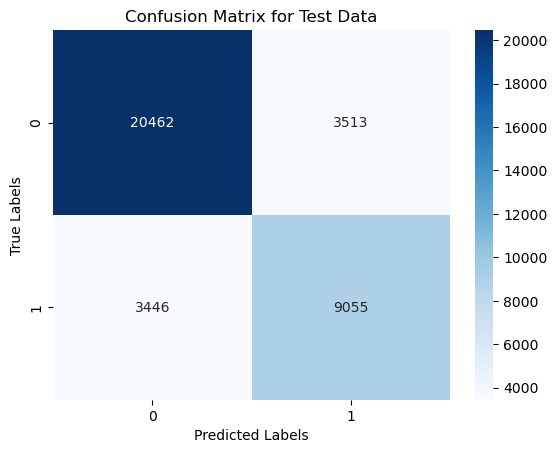

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix_values = [[20462,  3513],[ 3446, 9055]]

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix_values, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Data")
plt.xticks([0.5, 1.5], ["0", "1"])
plt.yticks([0.5, 1.5], ["0", "1"])

# Display the plot
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, train_size=0.75)

# Train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_classifier.predict(X_val)

# Calculate the evaluation metrics on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val, average="weighted")
precision_val = precision_score(y_val, y_pred_val, average="weighted")
f1_val = f1_score(y_val, y_pred_val, average="weighted")
cf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Print the evaluation metrics on the validation set
print("Results of Random Forest Classifier on Validation Set")
print("Accuracy    : ", accuracy_val)
print("Recall      : ", recall_val)
print("Precision   : ", precision_val)
print("F1-score    : ", f1_val)
print("Confusion Matrix   : ")
print(cf_matrix_val)

# Predict on the test set
y_pred_test = rf_classifier.predict(X_test)

# Calculate the evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average="weighted")
precision_test = precision_score(y_test, y_pred_test, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")
cf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the evaluation metrics on the test set
print("Results of Random Forest Classifier on Test Set")
print("Accuracy    : ", accuracy_test)
print("Recall      : ", recall_test)
print("Precision   : ", precision_test)
print("F1-score    : ", f1_test)
print("Confusion Matrix   : ")
print(cf_matrix_test)


Results of Random Forest Classifier on Validation Set
Accuracy    :  0.8662292325407125
Recall      :  0.8662292325407125
Precision   :  0.8674689872698589
F1-score    :  0.8667382581098381
Confusion Matrix   : 
[[64519  7919]
 [ 6719 30269]]
Results of Random Forest Classifier on Test Set
Accuracy    :  0.8652538655554337
Recall      :  0.8652538655554337
Precision   :  0.8669561650397047
F1-score    :  0.8659177209363987
Confusion Matrix   : 
[[21461  2718]
 [ 2197 10100]]


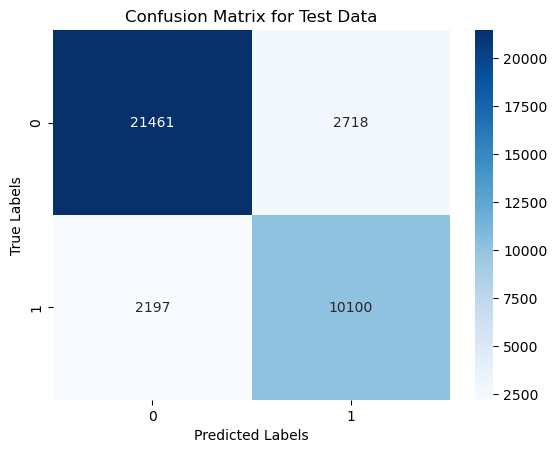

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix_values = [[21461,  2718],[ 2197, 10100]]

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix_values, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Data")
plt.xticks([0.5, 1.5], ["0", "1"])
plt.yticks([0.5, 1.5], ["0", "1"])

# Display the plot
plt.show()

In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

/Users/dharnidharreddybanala/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [112]:
# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn, average="weighted")
precision = precision_score(y_test, y_pred_knn, average="weighted")
cf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Results of KNN Classifier")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix   : ")
print(cf_matrix)

Results of KNN Classifier
Accuracy    :  0.7894964825608493
Recall      :  0.7894964825608493
Precision   :  0.787125388175605
Confusion Matrix   : 
[[102748  17525]
 [ 20866  41238]]


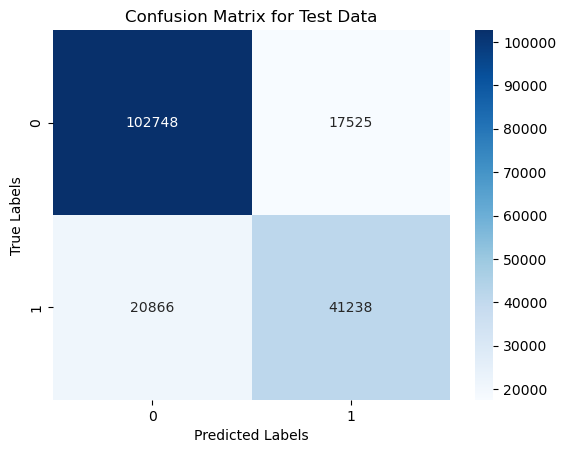

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
confusion_matrix_values = [[102748,  17525],[ 20866, 41238]]

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix_values, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Data")
plt.xticks([0.5, 1.5], ["0", "1"])
plt.yticks([0.5, 1.5], ["0", "1"])

# Display the plot
plt.show()